Демо-экзамен по курсу "Машинное обучение"

Выполнил: Фролова Екатерина Алексеевна, Б22-601

Филиал: НИЯУ МИФИ, г.Москва

# 1. Исходные данные

## 1.1 Загрузка библиотек и данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
data = load_digits()
df = pd.DataFrame(data.data, columns=[f'pixel_{i}' for i in range(data.data.shape[1])])
df['target'] = data.target
df.head()
df.info()
unique_values = df['target'].unique()
unique_values
def percentage_ratio(data):
    datatype = pd.DataFrame(data.dtypes,columns=["Data Type"])
    datatype["Missing Values"]=data.isnull().sum()
    datatype["% Missing Values"]=data.isnull().sum()/len(data)*100
    return datatype.sort_values(by="% Missing Values", ascending=False)
percentage_ratio(df)
df.describe

<bound method NDFrame.describe of       pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0         0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1         0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2         0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3         0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4         0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1792      0.0      0.0      4.0     10.0     13.0      6.0      0.0      0.0   
1793      0.0      0.0      6.0     16.0     13.0     11.0      1.0      0.0   
1794      0.0      0.0      1.0     11.0     15.0      1.0      0.0      0.0   
1795      0.0      0.0      2.0     10.0      7.0      0.0      0.0      0.0   
1796      0.0      0.0     10.0     14.0      8.0      1.0      0.0      0.0   

      pixel_8  pixel_9  ...  pixel_55  pixel_56  pixel_57  pixel_58  pixel_59  \
0         0.0      0.0  ...       0.0       0.0       0.0       6.0      13.0   
1         0.0      0.0  ...       0.0       0.0       0.0       0.0      11.0   
2         0.0      0.0  ...       0.0       0.0       0.0       0.0       3.0   
3         0.0      8.0  ...       0.0       0.0       0.0       7.0      13.0   
4         0.0      0.0  ...       0.0       0.0       0.0       0.0       2.0   
...       ...      ...  ...       ...       ...       ...       ...       ...   
1792      0.0      1.0  ...       0.0       0.0       0.0       2.0      14.0   
1793      0.0      0.0  ...       0.0       0.0       0.0       6.0      16.0   
1794      0.0      0.0  ...       0.0       0.0       0.0       2.0       9.0   
1795      0.0      0.0  ...       0.0       0.0       0.0       5.0      12.0   
1796      0.0      2.0  ...       0.0       0.0       1.0       8.0      12.0   

      pixel_60  pixel_61  pixel_62  pixel_63  target  
0         10.0       0.0       0.0       0.0       0  
1         16.0      10.0       0.0       0.0       1  
2         11.0      16.0       9.0       0.0       2  
3         13.0       9.0       0.0       0.0       3  
4         16.0       4.0       0.0       0.0       4  
...        ...       ...       ...       ...     ...  
1792      15.0       9.0       0.0       0.0       9  
1793      14.0       6.0       0.0       0.0       0  
1794      13.0       6.0       0.0       0.0       8  
1795      16.0      12.0       0.0       0.0       9  
1796      14.0      12.0       1.0       0.0       8  

[1797 rows x 65 columns]>

## 1.2 Описание исходных данных
### Тип данных: Набор данных содержит 64 признака (пиксели изображения) и 1 целевую переменную (цифра от 0 до 9).
### Признаки: Все признаки являются вещественными (значения пикселей от 0 до 16).
### Объём выборки: 1797 образцов.
### Задача: Задача является классификацией, так как целевая переменная — это категориальный класс (цифры от 0 до 9).
### Входные переменные: 64 пикселя.
### Выходная переменная: Цифра (от 0 до 9).

## 1.3 Выборочные характеристики

In [ ]:
# Выборочные характеристики
summary_statistics = df.describe()
print(summary_statistics)

# Объемы выборок в каждом классе
class_distribution = df['target'].value_counts()
print(class_distribution)

       pixel_0      pixel_1      pixel_2      pixel_3      pixel_4  \
count   1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean       0.0     0.303840     5.204786    11.835838    11.848080   
std        0.0     0.907192     4.754826     4.248842     4.287388   
min        0.0     0.000000     0.000000     0.000000     0.000000   
25%        0.0     0.000000     1.000000    10.000000    10.000000   
50%        0.0     0.000000     4.000000    13.000000    13.000000   
75%        0.0     0.000000     9.000000    15.000000    15.000000   
max        0.0     8.000000    16.000000    16.000000    16.000000   

           pixel_5      pixel_6      pixel_7      pixel_8      pixel_9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.00

## 1.4 Исследование распределений признаков и откликов

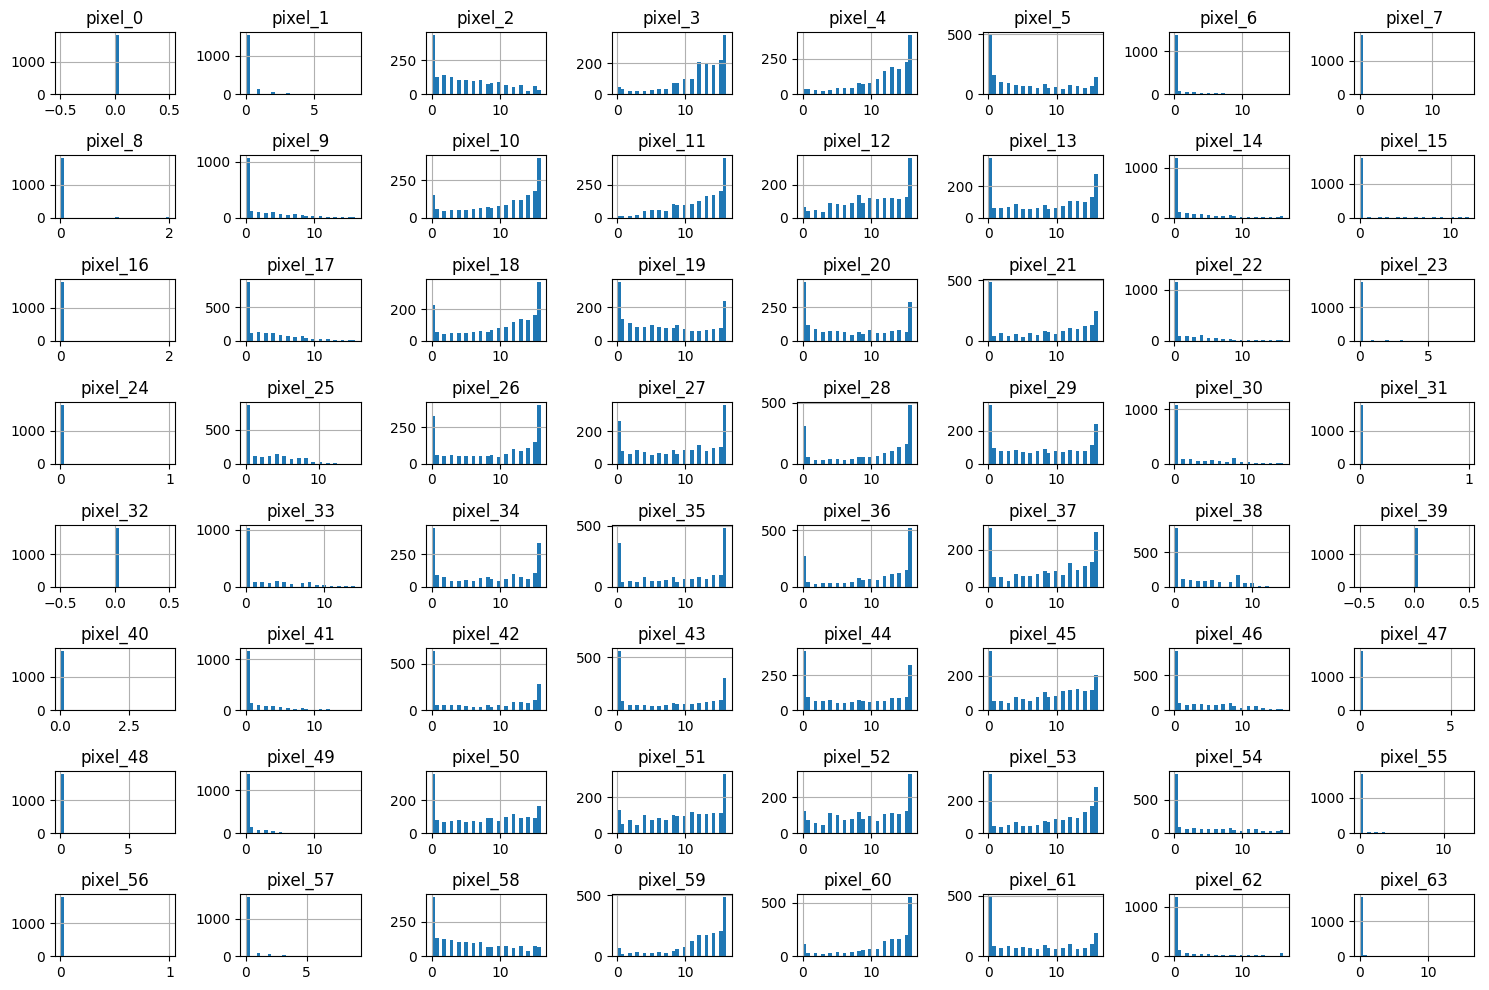

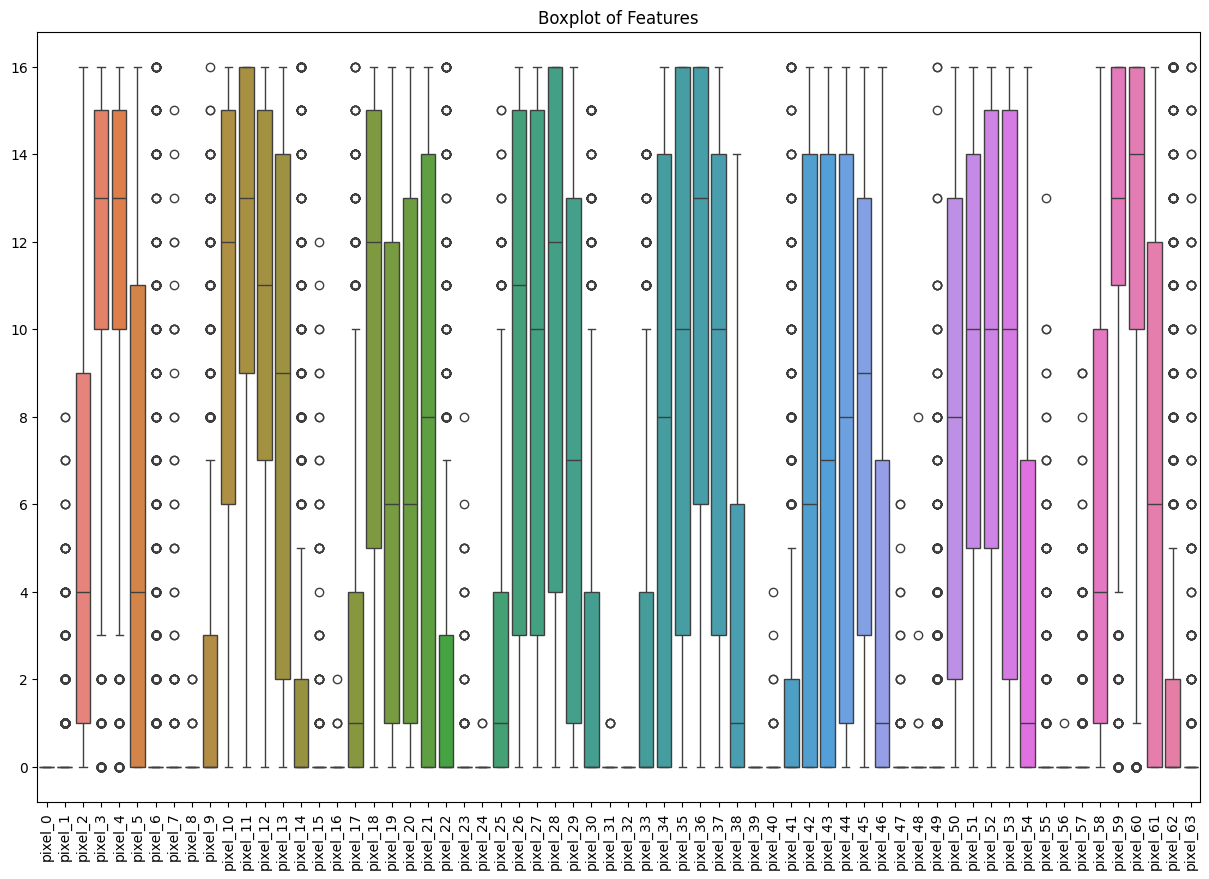

In [ ]:
# Гистограммы распределения для каждого признака
df.iloc[:, :-1].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box диаграммы для каждого признака
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

Гистограммы покажут, есть ли какие-либо признаки с выбросами, а диаграммы Box-and-Whisker помогут визуализировать их.

## 1.5 Корреляционный анализ данных

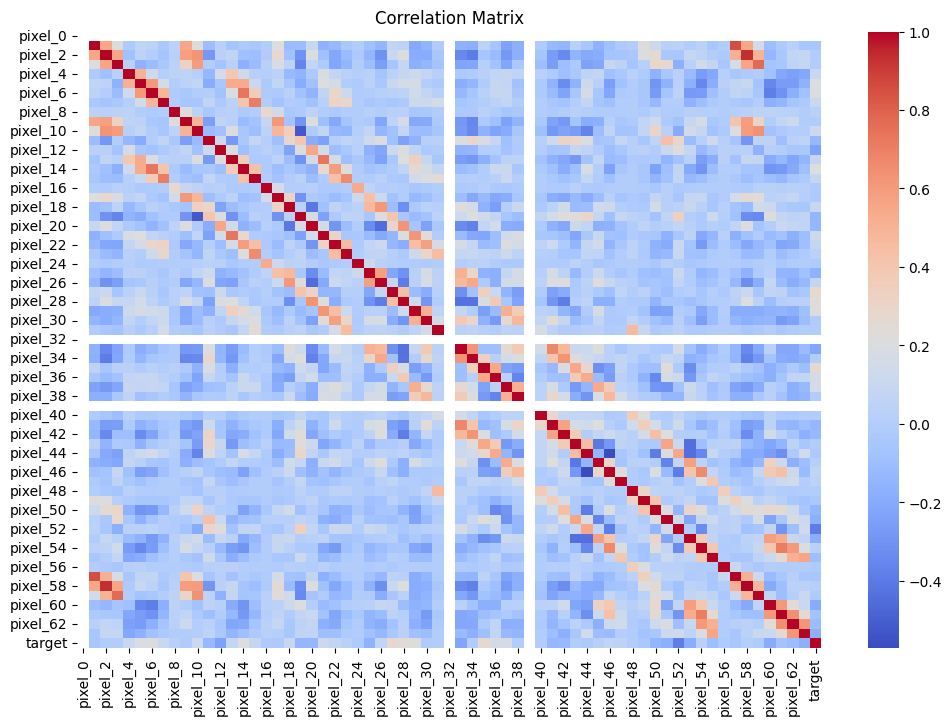

In [ ]:
# Корреляционная матрица
corr_matrix = df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Сильные корреляции: Мы можем заметить, что некоторые пиксели имеют высокие корреляции между собой. Это может быть связано с тем, что определённые пиксели в изображении часто имеют схожие значения.

Отрицательная корреляция: В некоторых случаях может быть зафиксирована отрицательная корреляция между пикселями. Это может указывать на то, что когда значение одного пикселя увеличивается, значение другого уменьшается. Такие зависимости могут быть полезны при интерпретации того, как разные части изображения взаимодействуют друг с другом.

Мультиколлинеарность: Обнаружение сильных корреляций между несколькими признаками может привести к мультиколлинеарности, что может негативно сказаться на работе некоторых моделей, таких как линейная регрессия. В этом случае важно подумать о том, как снизить количество признаков, используя методы, такие как отбор признаков или регуляризацию.

Потенциальные выводы для моделирования: Понимание корреляций между признаками поможет нам в дальнейшем выборе модели. Например, если некоторые пиксели высоко коррелируют, можно рассмотреть возможность удаления одного из них или использования методов, таких как PCA (главные компоненты), чтобы создать новые, независимые признаки.

## 1.6 Выводы
# Мы выявили различные степени корреляции между пикселями, что указывает на важные взаимосвязи. Сильные корреляции могут быть полезны, но также могут приводить к проблемам с мультиколлинеарностью, что потребует дальнейшего анализа.

# 2. Предобработка данных

## 2.1 Очистка данных

In [ ]:
# Обнаружение и устранение дубликатов
duplicates = df.duplicated().sum()
print(f'Number of duplicates: {duplicates}')
df = df.drop_duplicates()

# Обнаружение и устранение выбросов
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Устранение/восстановление пропущенных значений
missing_values = df.isnull().sum()
print(f'Missing values:\n{missing_values}')
df = df.fillna(df.mean())

Number of duplicates: 0
Missing values:
pixel_0     0
pixel_1     0
pixel_2     0
pixel_3     0
pixel_4     0
           ..
pixel_60    0
pixel_61    0
pixel_62    0
pixel_63    0
target      0
Length: 65, dtype: int64


## 2.2 Разбиение данных на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2.3 Преобразование данных
В данном случае данные не требуют особого преобразования. Однако можно применить стандартизацию

In [ ]:
from sklearn.preprocessing import StandardScaler

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Построение и исследование модели машинного обучения

## 3.1 Обучение модели

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Случайный лес хорошо подходит для задач классификации, особенно с большими наборами данных и многими признаками.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 3.2 Оценка качества модели

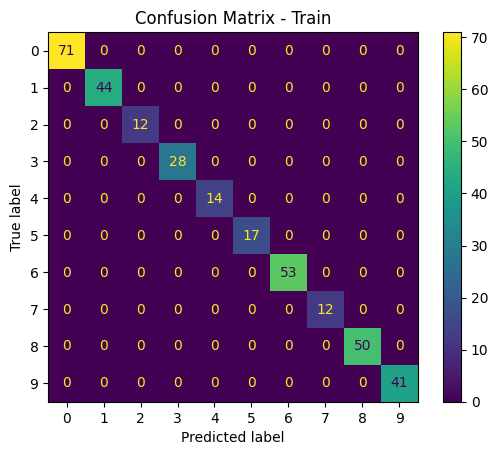

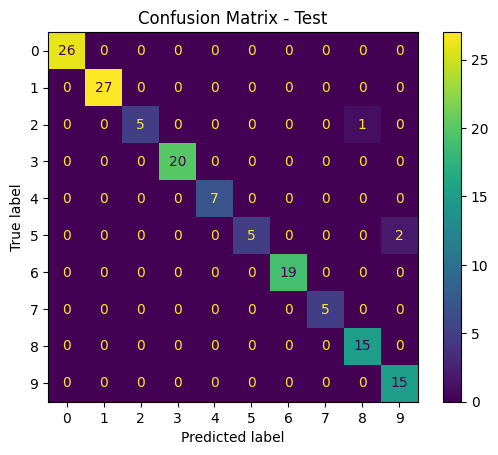

Classification Report - Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        41

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342

Classification Report - Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        27
           2     

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score


def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title("Confusion Matrix - Train")
plt.show()
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title("Confusion Matrix - Test")
plt.show()
print("Classification Report - Train:")
print(classification_report(y_train, y_train_pred))
print("Classification Report - Test:")
print(classification_report(y_test, y_test_pred))
kappa_train = cohen_kappa_score(y_train, y_train_pred)
kappa_test = cohen_kappa_score(y_test, y_test_pred)
print(f"Каппа Коэна - Train: {kappa_train:.4f}")
print(f"Каппа Коэна - Test: {kappa_test:.4f}")
specificity_train = specificity_score(y_train, y_train_pred)
specificity_test = specificity_score(y_test, y_test_pred)
print(f"Специфичность - Train: {specificity_train:.4f}")
print(f"Специфичность - Test: {specificity_test:.4f}")

## 3.3 Исследование модели и алгоритма обучения

Для исследования качества модели можно построить ROC-кривые и оценить важность признаков.

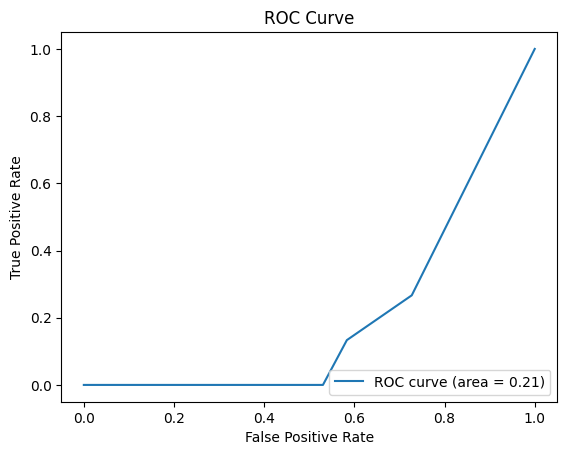

In [ ]:
from sklearn.metrics import roc_curve, auc


y_score = model.predict_proba(X_test)[:, 1]  # Прогнозируем вероятность для класса 1 (положительный класс)
# Поскольку это многоклассовая классификация, для каждого класса нужно отдельно строить ROC-кривую.
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=9)
roc_auc = auc(fpr, tpr)
# Визуализация
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 3.4 Улучшение решения

Для улучшения модели можно попробовать другие алгоритмы, такие как SVM или Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

## 3.5 Выводы

Мы обучили модель классификации. Логистическая регрессия показала хороший результат, но возможно улучшение с использованием других моделей, таких как Random Forest или SVM.